## Padaria

Uma padaria produz dois tipos de produtos: pão (P1) e massa de pizza (P2). 

Quatro diferentes matérias primas são utilizadas para a fabricação destes produtos: farinha (M1), fermento (M2), ovos (M3) e manteiga (M4), em que temos em estoque, respectivamente, 60 unidades, 38 unidades, 18 unidades e 55 unidades. 

Para produzir 1 kg de pão são necessárias 1 un. de farinha, 2 un. de fermento e 3 un. de manteiga. 

Para produzir 1 kg de massa de pizza são necessárias 3 un. de farinha, 1 un. de ovo e 1 un. de manteiga.

O pão e massa de pizza são vendidos ao custo de Reais 22/Kg e Reais 20/Kg.

Deseja-se determinar a quantidade de cada produto a ser fabricado que maximize as vendas e respeite as restrições de estoque.

x_1: quantidade, em quilos, de pães a serem produzidos

x_2: quantidade, em quilos, de massas de pizzas a serem produzidas

max 22 * x_1 + 20 * x_2

sujeito a:

x_1 + 3x_2 <= 60

2x_1 <= 38

x_2 <= 18

3x_1 + x_2 <= 55

x_1, x_2 >= 0

x_1, x_2 ∈ R

In [1]:
from docplex.mp.model import Model
import cplex

m = Model(name='Padaria')

variaveis = dict()

for i in range(1,3):
    variaveis[i] = m.continuous_var(name='x_{0}'.format(i))
    
m.add_constraint(variaveis[1] + 3*variaveis[2] <= 60)
m.add_constraint(2*variaveis[1] <= 38)
m.add_constraint(variaveis[2] <= 18)
m.add_constraint(3*variaveis[1] + variaveis[2] <= 55)

for i in range(1,3):
    m.add_constraint(variaveis[i]>=0)

m.maximize(22.0*variaveis[1] + 20.0*variaveis[2])

m.solve()
print(m.solution)

solution for: Padaria
objective: 601.25
x_1=13.125
x_2=15.625



### Usando o método de força bruta

1) testar, para cada combinação de m colunas de A, se elas formam uma base; 

2) calcular, para cada base, a solução básica associada a ela; 

3) calcular, para todas as SBV obtidas, o valor da função objetivo.

In [2]:
from math import factorial
from __future__ import print_function
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

**Forma padrão:**

x_1: quantidade, em quilos, de pães a serem produzidos

x_2: quantidade, em quilos, de massas de pizzas a serem produzidas

max 22 * x_1 + 20 * x_2

sujeito a:

x_1 + 3x_2 + x_3 = 60

2x_1 + x_4 = 38

x_2 + x_5 = 18

3x_1 + x_2 + x_6 = 55

x_1, x_2 >= 0

x_1, x_2 ∈ R

In [3]:
# Informar aqui os valores da matriz A
A = np.array([[1, 3, 1, 0, 0, 0],
              [2, 0, 0, 1, 0, 0],
              [0, 1, 0, 0, 1, 0],
              [3, 1, 0, 0, 0, 1]])

In [4]:
# Informar aqui os valores da matriz b
b = np.array([[60], 
              [38], 
              [18],
              [55]])

In [5]:
# Informar aqui os valores do vetor c
c = np.array([22, 20, 0, 0, 0, 0])

In [6]:
m = len(A)
print('m:', m)

n = len(A[0])
print('n:', n)

combinacoes = factorial(n)/(factorial(m)*(factorial(n-m)))

print('O número máximo de soluções básicas:', combinacoes)

m: 4
n: 6
O número máximo de soluções básicas: 15


In [7]:
def verifica_solucao_viavel(x):
    '''
        Função que verifica se a solução é viável
        
        >>> verifica_solucao_viavel([0, 0, [125.], 0, [125.], [475.], 0])
            Esta é uma solução básica viável
            True
        >> verifica_solucao_viavel([0, 0, 0, [300.], [-950.], 0, [500.]])
            Esta NÃO é uma solução básica viável
            False
        >> verifica_solucao_viavel([1, 0, 1, 0, 1, 0, 0])
            Esta é uma solução básica viável
            True
    '''
    
    xB_bool = []

    for w in range(0, len(x)):
        if(x[w] >= 0):
            xB_bool.append(True)           
        else:
            xB_bool.append(False)

        try:
            if(x[w][0] >= 0):
                xB_bool.append(True)
            else:
                xB_bool.append(False)
        except:
            pass
            
    if(all(xB_bool)):
        print('Esta é uma solução básica viável')
        return True
    else:
        print('Esta NÃO é uma solução básica viável')
        return False

In [8]:
solucoes_viaveis = np.array([[0, 0, 0, 0], 0, 0, 0])
todas_solucoes = np.array([[0, 0, 0, 0], 0, 0, 0])
cont_x = 0

for w in range(0, n):
    for y in range(w+1, n):
        for z in range(y+1, n):
            for j in range(z+1, n):
            
                # Id da solução
                cont_x = cont_x + 1;
                print('\nx', cont_x)

                # Conjunto de índices IB
                IB = [w,y,z,j]
                print('IB =', IB[0]+1, IB[1]+1, IB[2]+1, IB[3]+1)

                # B
                B = np.array([A[0][w], A[0][y], A[0][z], A[0][j]])
                for v in range (1, m):
                    B = np.row_stack(tup=(B, [A[v][w], A[v][y], A[v][z], A[v][j]]))
                print('B =', B, '\n')

                # Verificando se B é uma base
                v, V =  np.linalg.eig(B)

                if(v.all() == 0):

                    print('A matriz B não é uma base')
                    print('A linha LD é:')
                    print (B[v == 0,:])
                    print('\n---------------------------------------------------------------------------\n')

                    # Colocar na tabela de soluções básicas, com informações vazias
                    todas_solucoes = np.row_stack((todas_solucoes, [[IB[0]+1, IB[1]+1, IB[2]+1, IB[3]+1], cont_x, [], []]))
                    continue

                # B-1
                try:
                    B1 = np.linalg.inv(B)
                    print('B-1 =', B1, '\n')
                except:
                    print("B-1 não existe")
                    todas_solucoes = np.row_stack((todas_solucoes, [[IB[0]+1, IB[1]+1, IB[2]+1, IB[3]+1], cont_x, [], []]))
                    print('\n---------------------------------------------------------------------------\n')
                    continue

                # xB
                xB = B1.dot(b)
                print('xB =', xB, '\n')

                # x
                x = []
                for v in range (0, n):              
                    if(v == IB[0]):
                        x.append(round(xB[0],3))
                    elif(v == IB[1]):
                        x.append(round(xB[1],3))
                    elif(v == IB[2]):
                        x.append(round(xB[2],3))
                    elif(v == IB[3]):
                        x.append(round(xB[3],3))
                    else:
                        x.append(0)
                print('x =', x, '\n')

                # cTx
                cTx = np.transpose(c).dot(x)
                print('cTx =', cTx, '\n')

                # Colocar na tabela de soluções básicas
                todas_solucoes = np.row_stack((todas_solucoes, [[IB[0]+1, IB[1]+1, IB[2]+1, IB[3]+1], cont_x, cTx, x]))

                # Se a solução for viável, colocar na tabela de soluções viáveis
                if(verifica_solucao_viavel(x) == True):
                    solucoes_viaveis = np.row_stack((solucoes_viaveis, [[IB[0]+1, IB[1]+1, IB[2]+1, IB[3]+1], cont_x, cTx, x]))

                print('\n---------------------------------------------------------------------------\n')



x 1
IB = 1 2 3 4
B = [[1 3 1 0]
 [2 0 0 1]
 [0 1 0 0]
 [3 1 0 0]] 

B-1 = [[ 0.          0.         -0.33333333  0.33333333]
 [ 0.          0.          1.          0.        ]
 [ 1.         -0.         -2.66666667 -0.33333333]
 [ 0.          1.          0.66666667 -0.66666667]] 

xB = [[12.33333333]
 [18.        ]
 [-6.33333333]
 [13.33333333]] 

x = [12.333, 18.0, -6.333, 13.333, 0, 0] 

cTx = 631.326 

Esta NÃO é uma solução básica viável

---------------------------------------------------------------------------


x 2
IB = 1 2 3 5
B = [[1 3 1 0]
 [2 0 0 0]
 [0 1 0 1]
 [3 1 0 0]] 

B-1 = [[ 0.   0.5  0.   0. ]
 [ 0.  -1.5  0.   1. ]
 [ 1.   4.  -0.  -3. ]
 [ 0.   1.5  1.  -1. ]] 

xB = [[19.]
 [-2.]
 [47.]
 [20.]] 

x = [19.0, -2.0, 47.0, 0, 20.0, 0] 

cTx = 378.0 

Esta NÃO é uma solução básica viável

---------------------------------------------------------------------------


x 3
IB = 1 2 3 6
B = [[1 3 1 0]
 [2 0 0 0]
 [0 1 0 0]
 [3 1 0 1]] 

B-1 = [[ 0.   0.5  0.   0. ]
 [ 0. 

In [9]:
print("Todas as soluções:")

todas_solucoes = pd.DataFrame(todas_solucoes[1:,:], columns=['Conjunto de índices base', 'Id da solução', 'cTx', 'Solução básica associada à base']).sort_values(by=['Id da solução'])
todas_solucoes

Todas as soluções:


,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2, 3, 4]",1,631.326,"[12.333, 18.0, -6.333, 13.333, 0, 0]"
1,"[1, 2, 3, 5]",2,378,"[19.0, -2.0, 47.0, 0, 20.0, 0]"
2,"[1, 2, 3, 6]",3,778,"[19.0, 18.0, -13.0, 0, 0, -20.0]"
3,"[1, 2, 4, 5]",4,601.25,"[13.125, 15.625, 0, 11.75, 2.375, 0]"
4,"[1, 2, 4, 6]",5,492,"[6.0, 18.0, 0, 26.0, 0, 19.0]"
5,"[1, 2, 5, 6]",6,691.34,"[19.0, 13.667, 0, 0, 4.333, -15.667]"
6,"[1, 3, 4, 5]",7,403.326,"[18.333, 0, 41.667, 1.333, 18.0, 0]"
7,"[1, 3, 4, 6]",8,[],[]
8,"[1, 3, 5, 6]",9,418,"[19.0, 0, 41.0, 0, 18.0, -2.0]"
9,"[1, 4, 5, 6]",10,1320,"[60.0, 0, 0, -82.0, 18.0, -125.0]"


In [10]:
qtd_solucoes_basicas = map(lambda z, sb=0: sb if z == [] else sb+1, todas_solucoes.loc[:, 'cTx']).count(1)

print(qtd_solucoes_basicas)

print("\nQuantidade de soluções básicas: ", qtd_solucoes_basicas)

13

Quantidade de soluções básicas:  13


/home/myllah/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """Entry point for launching an IPython kernel.


In [11]:
print("Soluções viáveis:")

solucoes_viaveis = pd.DataFrame(solucoes_viaveis[1:,:], columns=['Conjunto de índices base', 'Id da solução', 'cTx', 'Solução básica associada à base']).sort_values(by=['Id da solução'])
solucoes_viaveis

Soluções viáveis:


,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2, 4, 5]",4,601.25,"[13.125, 15.625, 0, 11.75, 2.375, 0]"
1,"[1, 2, 4, 6]",5,492,"[6.0, 18.0, 0, 26.0, 0, 19.0]"
2,"[1, 3, 4, 5]",7,403.326,"[18.333, 0, 41.667, 1.333, 18.0, 0]"
3,"[2, 3, 4, 6]",12,360,"[0, 18.0, 6.0, 38.0, 0, 37.0]"
4,"[3, 4, 5, 6]",15,0,"[0, 0, 60.0, 38.0, 18.0, 55.0]"


In [12]:
qtd_solucoes_viaveis = len(solucoes_viaveis)
print("\nQuantidade de soluções viáveis: ", qtd_solucoes_viaveis)


Quantidade de soluções viáveis:  5


In [13]:
## Digite 1 se você deseja maximizar ou 2 se você deseja minimizar
entrada = 1

if(entrada == 1):
    solucao_otima = solucoes_viaveis['cTx'].max(axis=0)
elif(entrada == 2):
    solucao_otima = solucoes_viaveis['cTx'].min(axis=0)
print('Solução Ótima:', solucao_otima)

Solução Ótima: 601.25


In [14]:
print('\nSoluções que geram a solução ótima:\n')

geram_solucoes_otimas = solucoes_viaveis.loc[solucoes_viaveis['cTx'] == solucao_otima, :]

geram_solucoes_otimas


Soluções que geram a solução ótima:



,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2, 4, 5]",4,601.25,"[13.125, 15.625, 0, 11.75, 2.375, 0]"


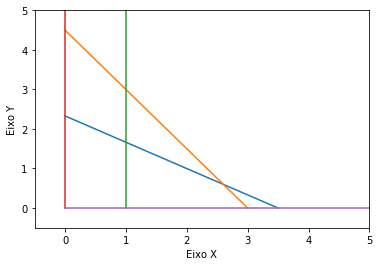

In [15]:
plt.plot([0, 3.5], [2.33, 0]) # 2*x_1 + 3*x_2 >= 7
plt.plot([0, 3], [4.5, 0]) # 3*x_1 + 2*x_2 >= 9
plt.plot([1, 1], [0, 6]) # x_1 >= 1

plt.plot([0, 0], [0, 8]) # x2 >= 0
plt.plot([0, 8], [0, 0]) # x1 >= 0

plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

plt.axis([-0.5, 5, -0.5, 5]) # [xmin, xmax, ymin, ymax]

plt.show()

In [16]:
pontos_extremos = 4

print('\nO número máximo de soluções básicas:', combinacoes)
print("\nQuantidade de soluções básicas: ", qtd_solucoes_basicas)
print("\nQuantidade de soluções viáveis: ", qtd_solucoes_viaveis)
print('\nPontos Extremos:', pontos_extremos)

print('\nSolução Ótima:', solucao_otima)


O número máximo de soluções básicas: 15

Quantidade de soluções básicas:  13

Quantidade de soluções viáveis:  5

Pontos Extremos: 4

Solução Ótima: 601.25
